# Project: Investigate a Dataset 

## Investigate a Medical appointment data and a glimpse at health assessment by age

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row
<li> ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.</li>
 <li>‘Neighborhood’ indicates the
location of the hospital.</li>
 <li>‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.</li>
 <li>It is noteworthy, to pay attention to values of No-show column: ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up</li>

In [90]:
#import statements needed for this project
#import packages necessary for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
#define any functions used for this project
"""his function accepts numerical equivalent of Week days and converts them into 
    equivalent week-day names   
    
    params  : numerical week days
    returns: week day names 
"""
def get_weekday_names(week_days) :
    #Dictionary to translate week day numbers to their equivalent text names
    weekday_dict = {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6: 'SUN'}
    #translate numerical week day to text equivalent
    labels = []
    for wk_day in scheduled_days:
       labels.append(weekday_dict[wk_day])
    
    return labels


<a id='wrangling'></a>
## Data Wrangling

> Now, let's load the data, check for cleanliness, and then trim and clean the dataset for analysis. 
### General Properties

In [92]:
# Load  data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')

print(df.shape)
      
#print few lines
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Cleanup

### Clean up un-necessary columns
PatientId and appointment id are not used in the analysis of the current data and more over PatientId is in exponential format which will not be any value addition for the analysis

In [93]:
#drop patiendId and appointment Id columns as they won't be used in the project 
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [94]:
#look for any missing data
df.isna().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### No missing data

  Provided data has no missing values as each column returned zero when looking for NaN value

In [95]:
#Find if there is duplicate data
df.duplicated().sum()

635

### Observation

There seem to 635 duplicate rows. Before proceeding to analyze the data, we should clean the duplicate reows.

In [96]:
#delete duplicate rows
df = df.drop_duplicates()
df.shape

(109892, 12)

### Observation 

After cleaningup for the duplicate rows, now the dataset has 109892 rows. Original dataset has 110527 and the clean-up step above deleted 635 rows (110527 - 635 = 109892)

## Validate the remaining data and normalize if necessary¶

### Verify if Age column for any anamoly

In [97]:
# Verify the range of Age
df.Age.describe()[['max', 'min']]

max    115.0
min     -1.0
Name: Age, dtype: float64

### Observations about Age
Max age of the patient is 115-years, though this is a bit out of normal it still a valid age. However, the minimum age is -1, which is not a valid value and it could be a typo and replacing this value with mean value is not meaningful so we can drop the row(s) with this invalid value. This also drives us to make sure there are no rows witha Zero Age value

In [98]:
# find all the rows that have invalid age (ie., Age is zero or negative values) and delete those rows, as the data
# could have been a typo error and it doesn't make sense to replace those values with a calculated value
df.drop(df[df['Age'] < 1].index, inplace=True)

In [99]:
#Reset the row index once row clean up is completed
df.reset_index(drop=True)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
106356,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
106357,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
106358,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
106359,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [100]:
# further cleaning of the data - rename the column names wherever there are typos,
# e.g., Hipertension (instead of Hypertension) and Handcap instead of Handicap and No-show to No_show
df.rename(columns={'Neighbourhood': 'Neighborhood', 'Hipertenstion':'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Observation

   Columns with typos are corrected and any columns with hiphens are replaced with underscore
   
   No_show column is boolean column but its values are in String form. To help us make any calculations this column can be replaced with equivalent numerical value

In [101]:
#change values in No_show column from string to numeric No = 0, Yes = 1
df['No_show'].replace({'No' : 0, 'Yes': 1}, inplace = True)

### Observation

  Scheduled Date and Appointment Date are in zulu format and can be converted to regulare date format. However, taking this a step further values in these columns can be replaced with a weekday value (i.e., 0 = Monday, 1 = Tuesday etc). This helps plotting the visualizations for this dataset.

In [102]:
#Replace values of date columns with Weekdays names
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.weekday
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.weekday

In [103]:
# get a count of how many patiens called on each day to schedule
df['ScheduledDay'].value_counts().sort_index()

0    22115
1    25160
2    23415
3    17396
4    18254
5       21
Name: ScheduledDay, dtype: int64

In [104]:
#get a count of how many appointments are scheduled for each day
df['AppointmentDay'].value_counts().sort_index()

0    21762
1    24700
2    24967
3    16586
4    18307
5       39
Name: AppointmentDay, dtype: int64

### Observation

  It looks like this facility operates only Monday-Saturday ( weekday values 0 - 5). Create a dictionarity to convert numerical values to their equivalent week day name

<a id='eda'></a>
## Exploratory Data Analysis

  
  Explore what day more appointments are scheduled for so that enough medical staff is made available to serve the patients
  

### Research Question 1
     
  Explore what day more patient's calling in to schedule appointments. Determining this should help the Scheduling department to adjust their staffing

<BarContainer object of 6 artists>

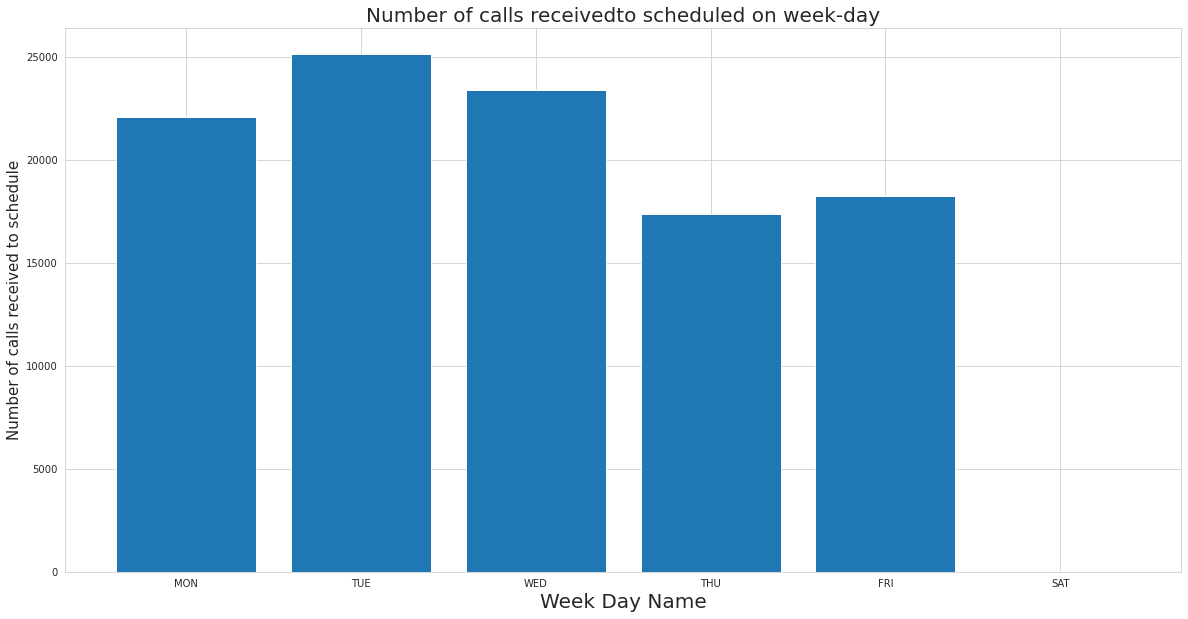

In [105]:
# Find the available week-days that his facility runs
scheduled_days = np.sort(df['ScheduledDay'].unique())
# How may calls are coming per week-day to sechdule
no_of_calls = df['ScheduledDay'].value_counts().sort_index()

#Polt the Scheduling data
plt.subplots(figsize=(20, 10))
plt.title('Number of calls receivedto scheduled on week-day', fontsize=20)
plt.xlabel('Week Day Name', fontsize=20)
plt.ylabel('Number of calls received to schedule', fontsize = 15);
plt.bar(scheduled_days, no_of_calls, tick_label = get_weekday_names(scheduled_days))

### Analysis for Scheduling

Tuesdays are busiest days followed by Wednesdays for scheduling department as they are receiving more calls on these days. Very few patients called in on Saturdays to schedule.

### Research Question 2
     
  Explore what days more appointments are scheduled. Determining this should help the adjustments to medical staffing resources.

<BarContainer object of 6 artists>

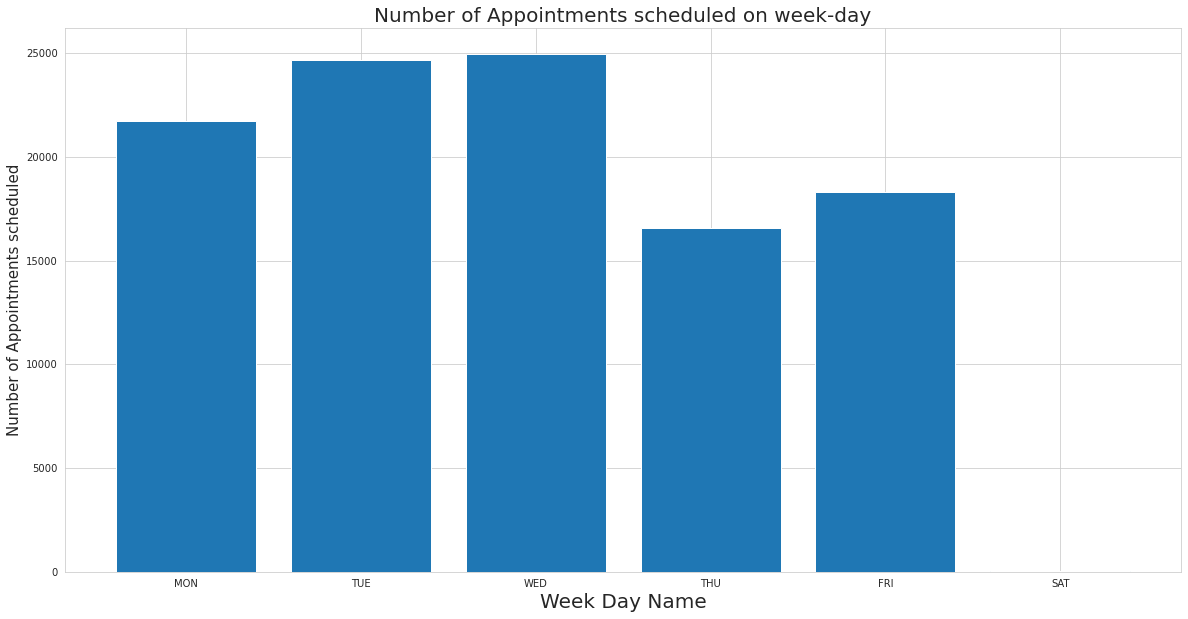

In [106]:
# Find the available week-days that this facility runs for appointments
appointment_days = np.sort(df['AppointmentDay'].unique())
#Find no. of appointments per week-day
no_of_appointments = df['AppointmentDay'].value_counts().sort_index()

plt.subplots(figsize=(20, 10))
plt.title('Number of Appointments scheduled on week-day', fontsize=20)
plt.xlabel('Week Day Name', fontsize=20)
plt.ylabel('Number of Appointments scheduled', fontsize = 15);
plt.bar(appointment_days, no_of_appointments, tick_label = get_weekday_names(appointment_days))

### Analysis for Appointments

Wednesdays are more busy followed by Tuesdays for medical staff. Saturdays are the least busy days.

### Research Question 3  

Which Neighborhood has highest No Shows for their appointments

In [107]:
#Derive total appointments for each neighborhood and save the results in a dataframe
df_t = df['Neighborhood'].value_counts().to_frame()
df_t.reset_index(inplace=True)
df_t.rename(columns={df_t.columns[0] : 'Neighborhood', df_t.columns[1]: 'Number_of_appointments'}, inplace=True)
df_t.head()

,Neighborhood,Number_of_appointments
0,JARDIM CAMBURI,7488
1,MARIA ORTIZ,5562
2,RESISTÊNCIA,4191
3,JARDIM DA PENHA,3848
4,ITARARÉ,3368


In [108]:
#neighborhoods with highest no shows
df_n = df.groupby('Neighborhood').sum()['No_show'].to_frame()
df_n.sort_values(by='No_show', ascending=False, inplace = True)
df_n.head()

,No_show
Neighborhood,
JARDIM CAMBURI,1396
MARIA ORTIZ,1194
ITARARÉ,877
RESISTÊNCIA,854
CENTRO,684


In [109]:
#Merge total appointments with no shows data using 'Neighborhood' as a join
df_ns = df_t.merge(df_n, left_on='Neighborhood', right_on='Neighborhood', how='inner')

#calculate percent of 'No Show' (% is calculated numberOfNoShows/TotalAppointments * 100)
df_ns['Pct_of_no_show'] = (df_ns['No_show'] / df_ns['Number_of_appointments']) * 100

#Sort the data with higet % of no shows at top
df_ns.sort_values(by='Pct_of_no_show', ascending=False, inplace=True)

df_ns.head()

,Neighborhood,Number_of_appointments,No_show,Pct_of_no_show
79,ILHAS OCEÂNICAS DE TRINDADE,2,2,100.000000
34,SANTOS DUMONT,1245,361,28.995984
55,SANTA CECÍLIA,443,120,27.088036
53,SANTA CLARA,491,130,26.476578
4,ITARARÉ,3368,877,26.039192


In [110]:
#One of the neighborhood is anamoly as evident from above and ignore it from the plotting to 
#get an accurate visualization
df_ns_top_10 = df_ns[1:11]

df_ns_top_10.head()

,Neighborhood,Number_of_appointments,No_show,Pct_of_no_show
34,SANTOS DUMONT,1245,361,28.995984
55,SANTA CECÍLIA,443,120,27.088036
53,SANTA CLARA,491,130,26.476578
4,ITARARÉ,3368,877,26.039192
8,JESUS DE NAZARETH,2718,675,24.834437


In [111]:
#Make Neigborhood as the row_index so it can be used for 'X' axis label
df_ns_top_10 = df_ns_top_10.set_index('Neighborhood')

df_ns_top_10.head()

,Number_of_appointments,No_show,Pct_of_no_show
Neighborhood,,,
SANTOS DUMONT,1245,361,28.995984
SANTA CECÍLIA,443,120,27.088036
SANTA CLARA,491,130,26.476578
ITARARÉ,3368,877,26.039192
JESUS DE NAZARETH,2718,675,24.834437


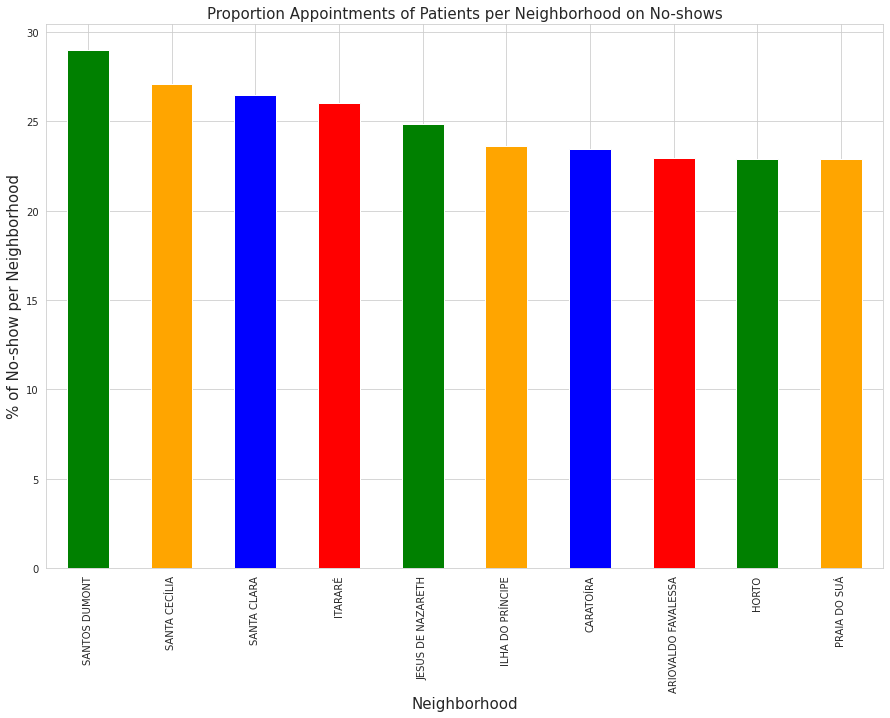

In [112]:
#plot the graph for %of No-Shows per neighborhood
df_ns_top_10['Pct_of_no_show'].plot(kind='bar', color=['green', 'orange', 'blue', 'red'], figsize=[15, 10])
sns.set_style('whitegrid')
plt.title('Proportion Appointments of Patients per Neighborhood on No-shows', fontsize=15)
plt.ylabel('% of No-show per Neighborhood', fontsize=15)
plt.xlabel('Neighborhood', fontsize=15);

## Analysis for No Shows 

 Patiends from Santos Dumont do not show to their appointments 1 in 3.5 times. 

## Research Question 4

  How are diseases affecting different Age group population in the given data

In [113]:
#Find the number of patients with Hipertension by Age and store in its own dataframe
df_hi = df.groupby('Age').sum()['Hipertension'].to_frame()

#Sort by number of patients impacted with Hipertension
df_hi.sort_values(ascending=False, by='Hipertension', inplace=True)

#print few rows
df_hi.head()

,Hipertension
Age,
66,664
56,660
64,639
59,636
58,624


In [114]:
#Find number of patients with Diabetes by Age and store in its own dataframe
df_db = df.groupby('Age').sum()['Diabetes'].to_frame()

#Sort by number of patients impacted with Diabetes
df_db.sort_values(ascending=False, by='Diabetes', inplace=True)

#print few rows
df_db.head()

,Diabetes
Age,
66,282
62,278
64,269
68,269
65,253


In [115]:
#Find number of patients with Alcholism by Age and store in its own dataframe
df_al = df.groupby('Age').sum()['Alcoholism'].to_frame()

#Sort by number patients impacted with Alcoholism
df_al.sort_values(ascending=False, by='Alcoholism', inplace=True)

#print few rows
df_al.head()

,Alcoholism
Age,
63,177
44,172
52,150
45,141
49,135


In [116]:
#merge all the patients with a disease
df_hidbal = df_hi.merge(df_db, left_on='Age', right_on='Age', how='inner').merge(df_al, left_on='Age', right_on='Age', how='inner').head(15)

#Sort the merged data by Age
df_hidbal.sort_values(by='Age', inplace=True)

#Convert Age field from row index to a column field
df_hidbal = df_hidbal.reset_index('Age')

#print few records
df_hidbal.head()

,Age,Hipertension,Diabetes,Alcoholism
0,53,594,208,114
1,54,561,205,102
2,56,660,234,87
3,57,599,250,102
4,58,624,214,58


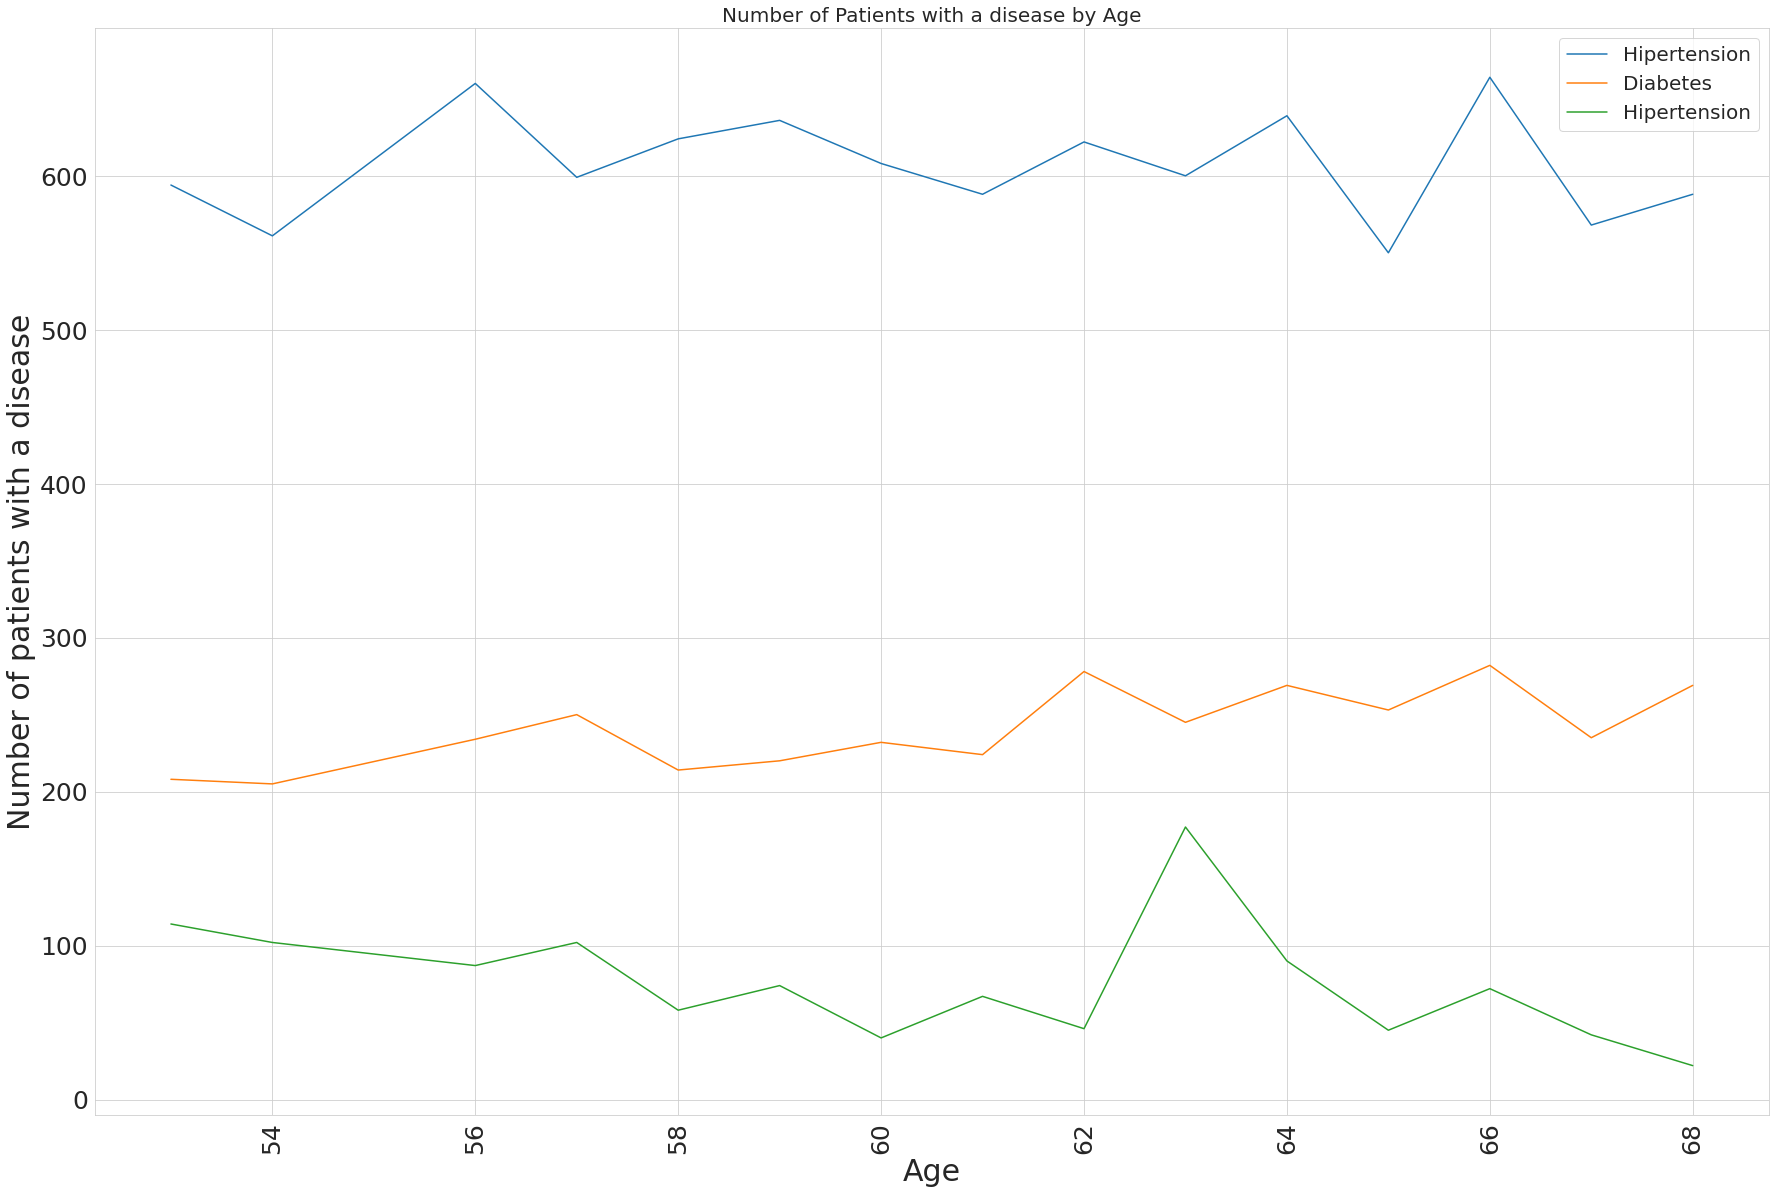

In [117]:
#build a line plot to show number of patients with each disease by Age
plt.subplots(figsize=(30, 20))
plt.title("Number of Patients with a disease by Age", fontsize=20)
plt.plot(df_hidbal['Age'], df_hidbal['Hipertension'], label='Hipertension')
plt.plot(df_hidbal['Age'], df_hidbal['Diabetes'], label='Diabetes')
plt.plot(df_hidbal['Age'], df_hidbal['Alcoholism'], label='Hipertension')
plt.legend(loc='upper right', fontsize=20)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Age', fontsize=30)
plt.ylabel('Number of patients with a disease', fontsize=30);
plt.show()

## Analysis for number of patients with Diseases by Age

   More patients with one of the diseases (with Hipertension, Diabetes or Alcholism) are in the age group of 54 thru 68. Within this age group Hipertension is very common followed by Diabetes and Alcoholism is the minimal concern among these three diseases.
   
   Number of patients with hipertension is gradually going down from age 56 thru 65 and there seems a spike between age 65 and 67. 
   
   Between Ages 54 and 68, number of patients with Diabetes is gradually growing as they age
   
   Alcholism is decreasing with age between Ages 54 and 68, with an exception of patients between ages of 62 and 64.

## Research Question 5

Has SMS receive any significance influence for patients to show for their appointments

In [118]:
#create a new dataframe to hold values for show/no-show and when SMS is ON or OFF
sms_show_df = pd.DataFrame()

#Gather the counts based on the conditions for SMS and Show/No-Show and assign those counts
#to appropriate meaninful variables
Sms_received_no_show = df[(df['SMS_received'] == 1) & (df['No_show'] == 1)].sum()['No_show']
Sms_received_showed_up = df[(df['SMS_received'] == 1) & (df['No_show'] == 0)].count()['No_show']

Sms_not_received_no_show = df[(df['SMS_received'] == 0) & (df['No_show'] == 1)].count()['No_show']
Sms_not_received_showed_up = df[(df['SMS_received'] == 0) & (df['No_show'] == 0)].count()['No_show']

#Provide appropriate column names and store the above results in the dataframe
sms_show_df['sms_show_no_show'] = ['Sms_received_no_show', 'Sms_received_showed_up', 'Sms_not_received_no_show', 'Sms_not_received_showed_up']
sms_show_df['number_show_no_show'] = [Sms_received_no_show, Sms_received_showed_up, Sms_not_received_no_show, Sms_not_received_showed_up]

<BarContainer object of 4 artists>

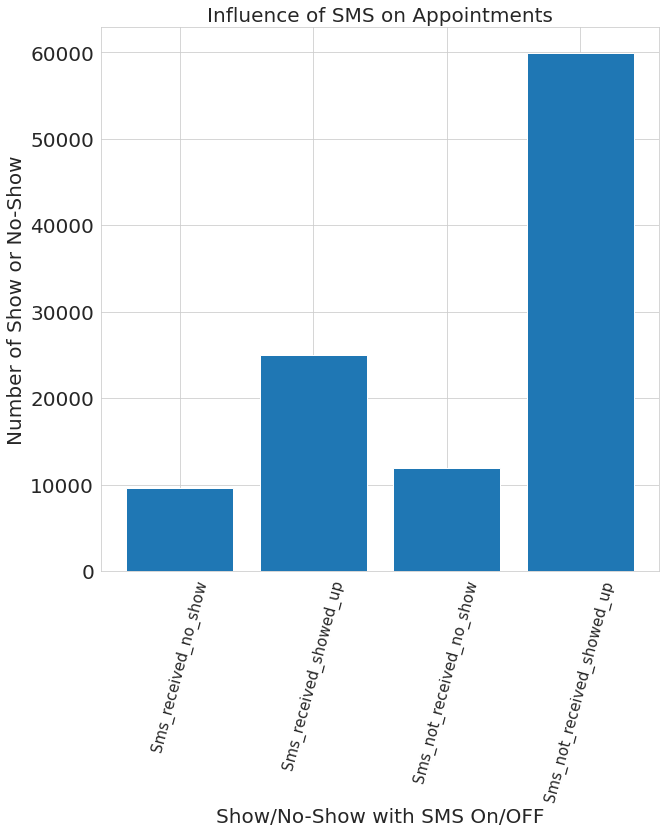

In [119]:
#Plot the data to visualize the influence of SMS on show/no-show for appointments
plt.subplots(figsize=(10, 10))
plt.title('Influence of SMS on Appointments', fontsize=20)
plt.xlabel('Show/No-Show with SMS On/OFF', fontsize=20)
plt.ylabel('Number of Show or No-Show', fontsize=20);
plt.xticks(rotation = 75, fontsize=15)
plt.yticks(fontsize=20)
plt.bar(sms_show_df['sms_show_no_show'], sms_show_df['number_show_no_show'], tick_label = sms_show_df['sms_show_no_show'])

## Analysis of SMS influence on Appointments

It seems SMS didn't play any significant role in influencing whether patients show up for their appointments. For example, Number of patients didn't show up for their appointments is almost identical whether they received SMS reminders or not. At the same time, patients who showed up for their appointments is far greater than those patients who didn't receive SMS.

In [120]:
#create a new dataframe to hold proportion of no shows based on age
age_no_show_df = pd.DataFrame()

#Gather the counts based on show / no-show for age range to calculate the no show percents by age
age_1_20_no_show = df[(df['Age'] >= 1) & (df['Age'] <= 20) & (df['No_show'] == 1)].count()['No_show']
age_1_20_tot = df[(df['Age'] >= 1) & (df['Age'] <= 20)].count()['No_show']


age_21_30_no_show = df[(df['Age'] >= 21) & (df['Age'] <= 30) & (df['No_show'] == 1)].count()['No_show']
age_21_30_tot = df[(df['Age'] >= 21) & (df['Age'] <= 30)].count()['No_show']

age_31_40_no_show = df[(df['Age'] >= 31) & (df['Age'] <= 40) & (df['No_show'] == 1)].count()['No_show']
age_31_40_tot = df[(df['Age'] >= 31) & (df['Age'] <= 40)].count()['No_show']

age_41_50_no_show = df[(df['Age'] >= 41) & (df['Age'] <= 50) & (df['No_show'] == 1)].count()['No_show']
age_41_50_tot = df[(df['Age'] >= 41) & (df['Age'] <= 50)].count()['No_show']

age_51_60_no_show = df[(df['Age'] >= 51) & (df['Age'] <= 60) & (df['No_show'] == 1)].count()['No_show']
age_51_60_tot = df[(df['Age'] >= 51) & (df['Age'] <= 60)].count()['No_show']

age_61_70_no_show = df[(df['Age'] >= 61) & (df['Age'] <= 70) & (df['No_show'] == 1)].count()['No_show']
age_61_70_tot = df[(df['Age'] >= 61) & (df['Age'] <= 70)].count()['No_show']

age_71_80_no_show = df[(df['Age'] >= 71) & (df['Age'] <= 80) & (df['No_show'] == 1)].count()['No_show']
age_71_80_tot = df[(df['Age'] >= 71) & (df['Age'] <= 80)].count()['No_show']

age_81_90_no_show = df[(df['Age'] >= 81) & (df['Age'] <= 90) & (df['No_show'] == 1)].count()['No_show']
age_81_90_tot = df[(df['Age'] >= 81) & (df['Age'] <= 90)].count()['No_show']

#Calculate the no show percent by age
age_1_20_no_show_pct = (age_1_20_no_show/age_1_20_tot) * 100
age_21_30_no_show_pct = (age_21_30_no_show/age_21_30_tot) * 100
age_31_40_no_show_pct = (age_31_40_no_show/age_31_40_tot) * 100
age_41_50_no_show_pct = (age_41_50_no_show/age_41_50_tot) * 100
age_51_60_no_show_pct = (age_51_60_no_show/age_51_60_tot) * 100
age_61_70_no_show_pct = (age_61_70_no_show/age_61_70_tot) * 100
age_71_80_no_show_pct = (age_71_80_no_show/age_71_80_tot) * 100
age_81_90_no_show_pct = (age_81_90_no_show/age_81_90_tot) * 100

                   

#Provide appropriate column names and store the above results in the dataframe
age_no_show_df['age_no_show'] = ['1-20', '21-30', '31-40', 
                                   '41-50', '51-60', '61-70',  
                                   '71-80', '81-90']
age_no_show_df['pct_no_show'] = [age_1_20_no_show_pct, age_21_30_no_show_pct, age_31_40_no_show_pct, 
                                      age_41_50_no_show_pct, age_51_60_no_show_pct, age_61_70_no_show_pct,  
                                      age_71_80_no_show_pct, age_81_90_no_show_pct]

<BarContainer object of 8 artists>

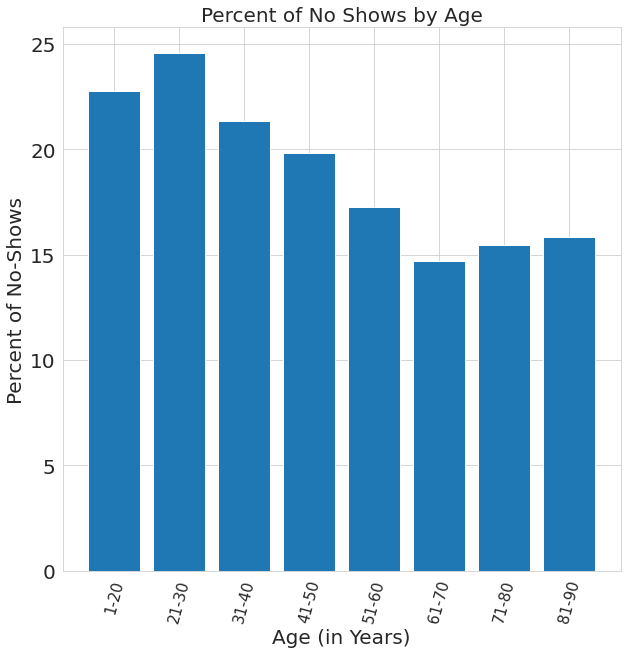

In [121]:
#Plot the data to visualize the influence of SMS on show/no-show for appointments
plt.subplots(figsize=(10, 10))
plt.title('Percent of No Shows by Age', fontsize=20)
plt.xlabel('Age (in Years)', fontsize=20)
plt.ylabel('Percent of No-Shows', fontsize=20);
plt.xticks(rotation = 75, fontsize=15)
plt.yticks(fontsize=20)
plt.bar(age_no_show_df['age_no_show'], age_no_show_df['pct_no_show'], tick_label = age_no_show_df['age_no_show'])

<a id='conclusions'></a>
## Conclusions

This facility is busier on Tuesdays and Wednesdays as more people are scheduling their appointments on these days or they have their appointments scheduled for these days. 

The trend seem to be majority of the times 1 in 3 to 4 patiens do not show up for their appointments. 

Hipertension seems to be main concern in patients with Ages ranging from 54 thru 68.

This facility may need to run a promotion to increase the awareness of the importance of SMS reminders to improve the turnout so patients do not miss their appointments

Number of cancellations are highest for the age group 21-30 and then the chances of cancellations is gradually decreasing with age, However, the chances of cancellations again show an uptick for the patients with ages greater than 70.

## Limitations of the dataset
This data set has number of records with Age zero and at lest one record with Age less than 0. Assuming those records with Age less than zero or for babies born recently, those records were removed from the analysis as there is not enough evidence to support this assumption. This could cause some of the calculations and observations not to reflect the clear picture of whole dataset, as those records were dropped from the analysis

In [122]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1